In [ ]:
# !unzip /content/drive/MyDrive/archive.zip -d /content/drive/MyDrive/WeatherRecognitionDataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,MaxPool2D,Conv2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy 
from sklearn.metrics import confusion_matrix

In [3]:
import itertools 
import shutil
import os
import random

In [ ]:
# dataset = os.listdir('/content/drive/MyDrive/WeatherRecognitionDataset/dataset')
# dataset.remove('rainbow')
# dataset

In [ ]:
# Organizing the data into train, valid and test dirs
os.chdir('/content/drive/MyDrive/WeatherRecognitionDataset/dataset')
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('valid')
  os.mkdir('test')

  for i in dataset:
    shutil.move(f'{i}','train')
    os.mkdir(f'valid/{i}')
    os.mkdir(f'test/{i}')

    valid_samples = random.sample(os.listdir(f'train/{i}'),20)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}', f'valid/{i}') 

    test_samples = random.sample(os.listdir(f'train/{i}'),5)
    for k in test_samples:
      shutil.move(f'train/{i}/{k}', f'test/{i}') 
  
os.chdir('../..')

In [4]:
train_path = '/content/drive/MyDrive/WeatherRecognitionDataset/dataset/train'
valid_path = '/content/drive/MyDrive/WeatherRecognitionDataset/dataset/valid'
test_path = '/content/drive/MyDrive/WeatherRecognitionDataset/dataset/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory = train_path, class_mode='categorical', target_size=(224,224), classes=['dew','fogsmog','frost','glaze','hail','lightning','rain','rime','sandstorm','snow'], batch_size=10 
)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory = valid_path, class_mode='categorical', target_size=(224,224), classes=['dew','fogsmog','frost','glaze','hail','lightning','rain','rime','sandstorm','snow'], batch_size=10
)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory = test_path, class_mode='categorical', target_size=(224,224), classes=['dew','fogsmog','frost','glaze','hail','lightning','rain','rime','sandstorm','snow'], batch_size=10, shuffle=False 
)

Found 6380 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

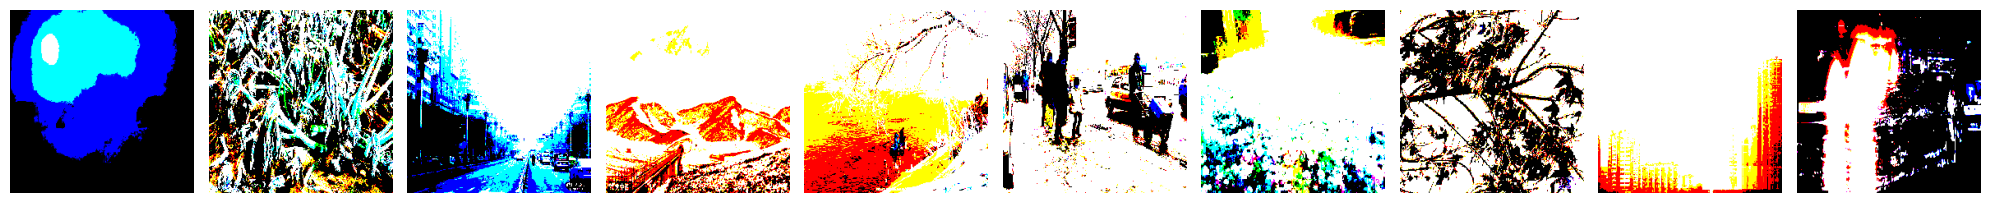

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
vgg_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 3s 0us/step


In [10]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model = Sequential()

In [12]:
for layer in vgg_model.layers[:-1]:
  model.add(layer)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
for layer in model.layers:
  layer.trainable = False 

In [15]:
model.add(Dense(units=10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [17]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
638/638 - 1866s - loss: 0.8973 - accuracy: 0.7039 - val_loss: 0.6932 - val_accuracy: 0.7850 - 1866s/epoch - 3s/step
Epoch 2/10
638/638 - 60s - loss: 0.4688 - accuracy: 0.8420 - val_loss: 0.5799 - val_accuracy: 0.8100 - 60s/epoch - 94ms/step
Epoch 3/10
638/638 - 60s - loss: 0.3747 - accuracy: 0.8760 - val_loss: 0.5836 - val_accuracy: 0.7950 - 60s/epoch - 94ms/step
Epoch 4/10
638/638 - 61s - loss: 0.3185 - accuracy: 0.8942 - val_loss: 0.5631 - val_accuracy: 0.8250 - 61s/epoch - 96ms/step
Epoch 5/10
638/638 - 61s - loss: 0.2745 - accuracy: 0.9132 - val_loss: 0.5777 - val_accuracy: 0.8300 - 61s/epoch - 96ms/step
Epoch 6/10
638/638 - 61s - loss: 0.2410 - accuracy: 0.9246 - val_loss: 0.5518 - val_accuracy: 0.8350 - 61s/epoch - 95ms/step
Epoch 7/10
638/638 - 60s - loss: 0.2133 - accuracy: 0.9353 - val_loss: 0.5708 - val_accuracy: 0.8350 - 60s/epoch - 94ms/step
Epoch 8/10
638/638 - 61s - loss: 0.1892 - accuracy: 0.9462 - val_loss: 0.5797 - val_accuracy: 0.8150 - 61s/epoch - 96ms/ste

In [19]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

In [20]:
test_batches.class_indices

{'dew': 0,
 'fogsmog': 1,
 'frost': 2,
 'glaze': 3,
 'hail': 4,
 'lightning': 5,
 'rain': 6,
 'rime': 7,
 'sandstorm': 8,
 'snow': 9}

In [21]:
predictions = model.predict(x=test_batches, verbose=0)

In [22]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black' )
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
predictions

array([[9.50693429e-01, 1.54153315e-06, 4.02254760e-02, 6.51091977e-04,
        8.33794568e-03, 1.16800836e-08, 9.76892807e-07, 4.86407844e-05,
        1.95911707e-06, 3.89210145e-05],
       [9.99868155e-01, 6.15276861e-07, 5.04880511e-08, 8.82187265e-08,
        5.02925150e-06, 7.70744464e-07, 1.24993050e-04, 3.65916037e-07,
        1.81973503e-09, 8.30258262e-09],
       [9.99993324e-01, 4.28421856e-07, 1.81182986e-06, 1.13040994e-06,
        4.21915587e-08, 4.86597651e-10, 3.21986658e-06, 2.10495260e-10,
        1.65850533e-09, 1.87187847e-08],
       [9.99978065e-01, 5.23735117e-08, 1.26025006e-05, 7.54281427e-06,
        1.62658455e-06, 4.89539409e-10, 9.30883104e-08, 7.17148030e-09,
        8.92161278e-09, 1.31840395e-07],
       [9.91107643e-01, 2.25354686e-08, 5.35072526e-03, 2.69146310e-03,
        4.34856556e-05, 8.38692404e-09, 4.95046386e-08, 8.04325216e-04,
        8.88831764e-08, 2.28961403e-06],
       [9.14446741e-09, 9.82809603e-01, 2.84088372e-07, 1.47291212e-05,
   

In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred = np.argmax(predictions,axis=1))

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 1 0]
 [1 0 3 1 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 4 0 1]
 [0 0 0 0 0 0 0 0 5 0]
 [0 1 0 0 0 0 0 0 0 4]]


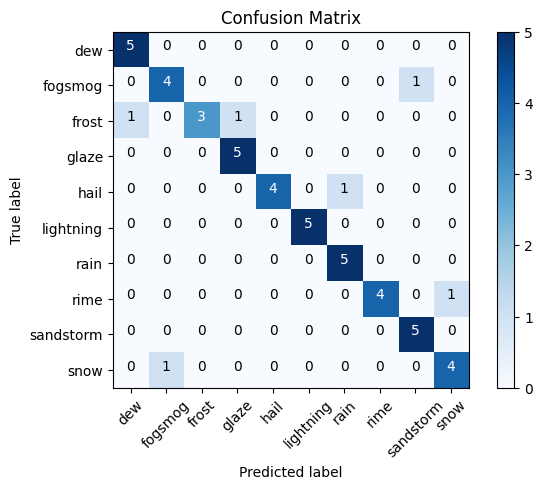

In [26]:
cm_plot_labels = ['dew','fogsmog','frost','glaze','hail','lightning','rain','rime','sandstorm','snow']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [30]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_labels, np.argmax(predictions, axis=1))))

print('Micro Precision: {:.2f}'.format(precision_score(test_labels, np.argmax(predictions, axis=1), average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_labels, np.argmax(predictions, axis=1), average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_labels, np.argmax(predictions, axis=1), average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_labels, np.argmax(predictions, axis=1), average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_labels, np.argmax(predictions, axis=1), average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_labels, np.argmax(predictions, axis=1), average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_labels, np.argmax(predictions, axis=1), average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_labels, np.argmax(predictions, axis=1), average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_labels, np.argmax(predictions, axis=1), average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_labels, np.argmax(predictions, axis=1), target_names=['dew','fogsmog','frost','glaze','hail','lightning','rain','rime','sandstorm','snow']))


Accuracy: 0.88

Micro Precision: 0.88
Micro Recall: 0.88
Micro F1-score: 0.88

Macro Precision: 0.89
Macro Recall: 0.88
Macro F1-score: 0.88

Weighted Precision: 0.89
Weighted Recall: 0.88
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

         dew       0.83      1.00      0.91         5
     fogsmog       0.80      0.80      0.80         5
       frost       1.00      0.60      0.75         5
       glaze       0.83      1.00      0.91         5
        hail       1.00      0.80      0.89         5
   lightning       1.00      1.00      1.00         5
        rain       0.83      1.00      0.91         5
        rime       1.00      0.80      0.89         5
   sandstorm       0.83      1.00      0.91         5
        snow       0.80      0.80      0.80         5

    accuracy                           0.88        50
   macro avg       0.89      0.88      0.88        50
weighted avg       0.89      0.88      0.88        50



There are two different ways to calculate this which might get confusing from time to time. We know that precision depends on true positives and false positives.

Macro averaged precision: calculate precision for all classes individually and then average them

Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision

Similarly, we can calculate the recall and f1-score.
